<h1>This task is to understand algerian forest fire dataset using <b>Lasso Regression</b> model</h1>

In [1]:
# import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
# Initializing the dataset 

DATA = "https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/INeuron-Classes-Assignments/main/Assignments/151022/forestfires.csv"

In [3]:
# Reading the dataset using read csv function

dataset = pd.read_csv(DATA)

In [4]:
COLUMN_DESCRIPTIONS = {
    "FFMC": "Fine Fuel Moisture Code", 
    "DMC": "Duff Moisture Code",
    "DC": "Drought Code",
    "ISI": "The ISI is a score that correlates with fire velocity spread",
    "temp": "Temperature in Celsius degrees",
    "RH": "Relative humidity in %",
    "wind": "Wind speed in km/h",
    "rain": "Outside rain in mm/m2",
    "area": "The burned area of the forest in ha"
}

In [5]:
# Data preview

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Text(0, 0.5, 'Temperature in Celsius degrees')

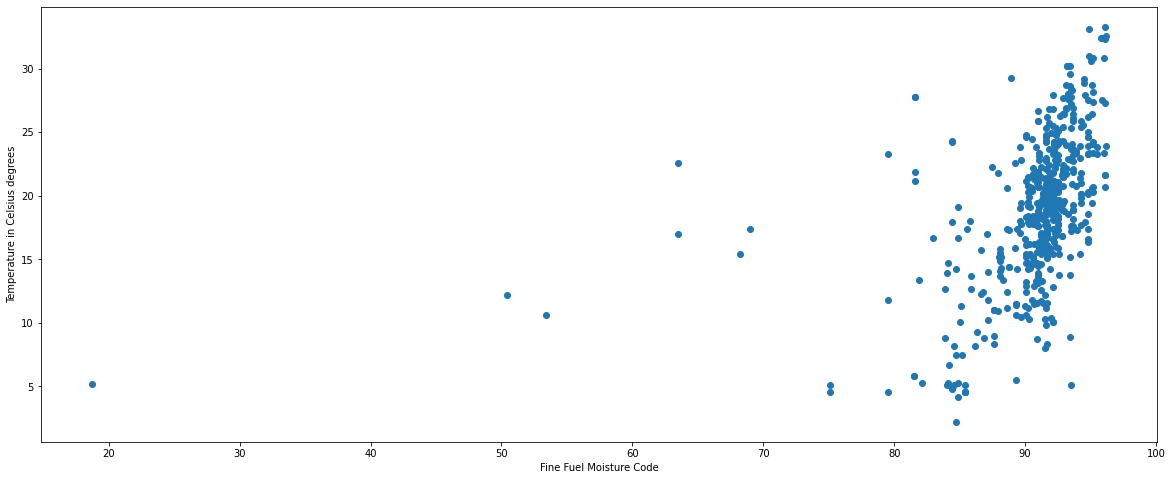

In [6]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['FFMC'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('FFMC'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


Text(0, 0.5, 'Temperature in Celsius degrees')

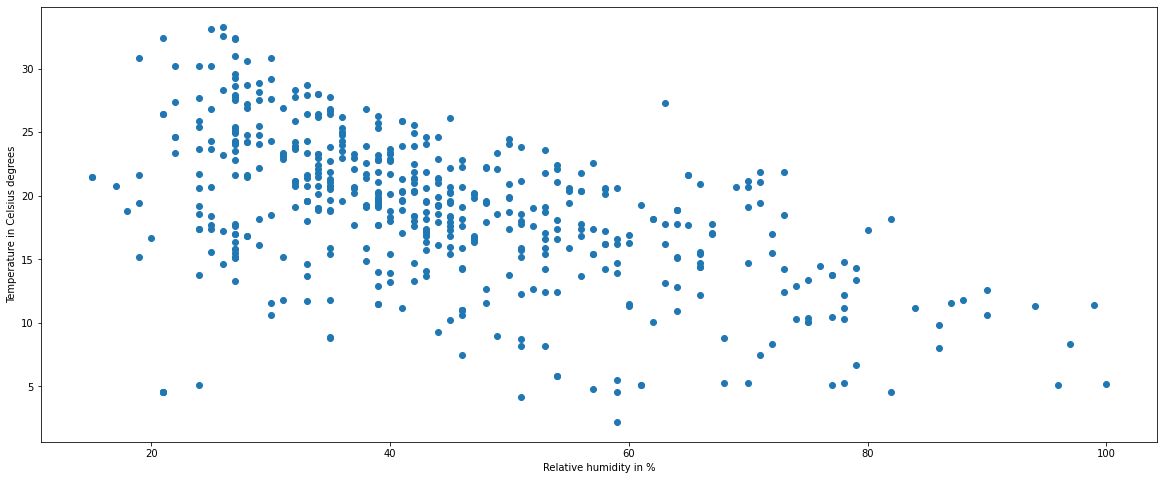

In [7]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['RH'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('RH'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


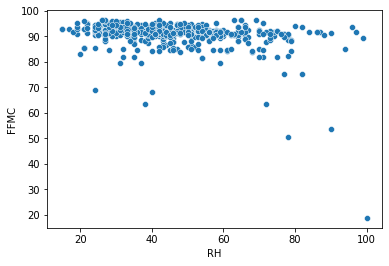

In [8]:
sns.scatterplot( x = dataset["RH"], y = dataset["FFMC"])

# independent variables are uniformly distributed

In [9]:
# Creating training models

In [10]:
### Identifying dependent and independent feature


X = dataset[['FFMC', 'RH']]
y = dataset['temp']

In [11]:
# Model selection

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [14]:
# Standardize the dataset

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
# Performing fit and transformation on train and test data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
## Model training

In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso = Lasso()

In [21]:
lasso.fit(X_train, y_train)

Lasso()

In [22]:
## print cofficient and intercept

print("Coefficient: ", lasso.coef_)
print("Intercept: ", lasso.intercept_)

Coefficient:  [ 0.84080142 -2.11067617]
Intercept:  19.002601156069364


In [23]:
#Prediction for test data
lasso_prediction = lasso.predict(X_test)

In [24]:
lasso_prediction

array([21.6088304 , 19.211623  , 19.52085874, 18.07703596, 15.80641656,
       13.37882682, 21.40954616, 19.22753683, 19.92557747, 14.73693019,
       21.08078325, 21.06992809, 21.13286075, 21.94229822, 21.32780899,
       15.43424816, 21.58387565, 19.35412483, 20.94804501, 19.88615422,
       21.39580033, 18.31502079, 13.5296469 , 19.51254048, 14.66423394,
       17.77467314, 21.32780899, 18.3052572 , 20.18923971, 20.82290235,
       17.81409639, 21.79147814, 17.36452683, 14.47109994, 21.69599515,
       20.02937872, 13.96474796, 13.54556073, 18.56060119, 18.4817547 ,
       17.69438131, 15.20385891, 19.66336056, 16.8476886 , 19.22753683,
       15.9246863 , 21.56181157, 19.085035  , 18.25136546, 19.76427114,
       14.11267737, 19.15628592, 18.81522252, 22.98284759, 20.08543846,
       22.52134644, 21.64825365, 20.7046326 , 20.60010869, 21.61642598,
       21.31478583, 21.11622425, 22.03705855, 19.48143549, 20.06880196,
       20.51366661, 18.91070551, 21.52094299, 20.06120638, 21.60

In [25]:
# Assumptions

Text(0, 0.5, 'Test predicted data')

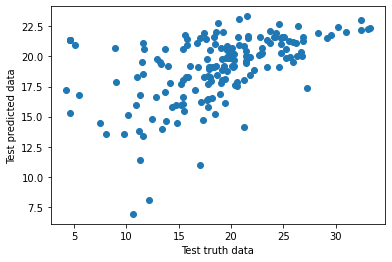

In [26]:
plt.scatter(y_test, lasso_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

Text(0, 0.5, 'Test predicted data')

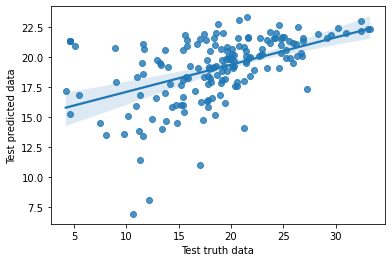

In [27]:
sns.regplot(x = y_test, y = lasso_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

In [28]:
# residuals

residuals = y_test - lasso_prediction

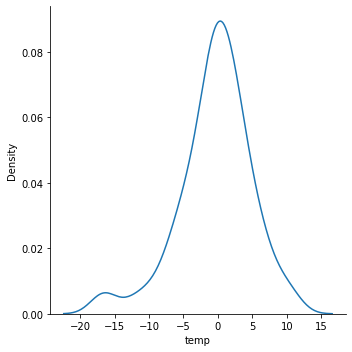

In [29]:
sns.displot(residuals, kind="kde")

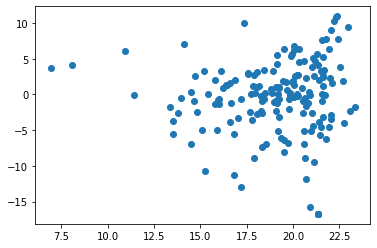

In [30]:
plt.scatter(lasso_prediction, residuals)

In [31]:
# Cost function analysis

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test, lasso_prediction)
MAE = mean_squared_error(y_test, lasso_prediction)
print("Mean Squared Error", MSE)
print("Mean Absolute Error", MAE)
print("Root Mean Square Error", np.sqrt(MSE))

Mean Squared Error 27.678546053145713
Mean Absolute Error 27.678546053145713
Root Mean Square Error 5.2610403964563615


In [33]:
# Performance metrics

In [34]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lasso_prediction)
adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [35]:
print("R Squared: ", score)
print("Adjusted R Sqaured: ", adj_score)

R Squared:  0.23784592256017367
Adjusted R Sqaured:  0.22877265973350902
